## Configurations

In [1]:
import balloon
config = balloon.BalloonConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_SHAPES                [[256 256]
 [128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [ 0.1  0.1  0.2  0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_MAX_DIM                  1024
IMAGE_MIN_DIM                  800
IMAGE_PADDING                  True
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [ 123.7  116.8  103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           balloon
NUM_CLASSES                    2
POOL_SIZE  

Using TensorFlow backend.


## Dataset

In [2]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
import balloon
dataset = balloon.BalloonDataset()
dataset.load_balloon("tmps/balloon", "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 61
Class Count: 2
  0. BG                                                
  1. balloon                                           


## Display Samples

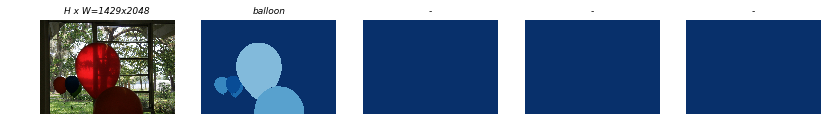

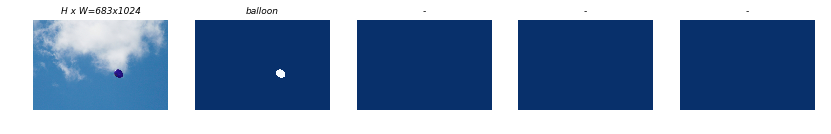

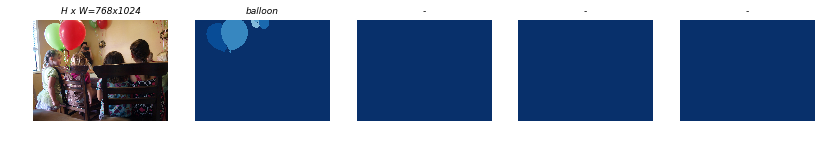

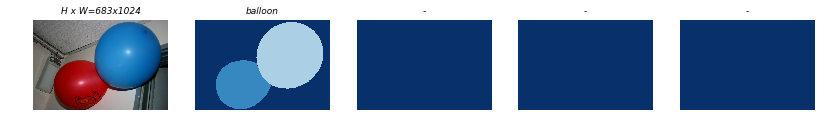

In [3]:
import numpy as np
import visualize

image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Bounding Boxes

image_id  47 tmps/balloon/train/5013250607_26359229b6_b.jpg
image                    shape: (681, 1024, 3)        min:    0.00000  max:  255.00000
mask                     shape: (681, 1024, 3)        min:    0.00000  max:    1.00000
class_ids                shape: (3,)                  min:    1.00000  max:    1.00000
bbox                     shape: (3, 4)                min:    2.00000  max: 1024.00000


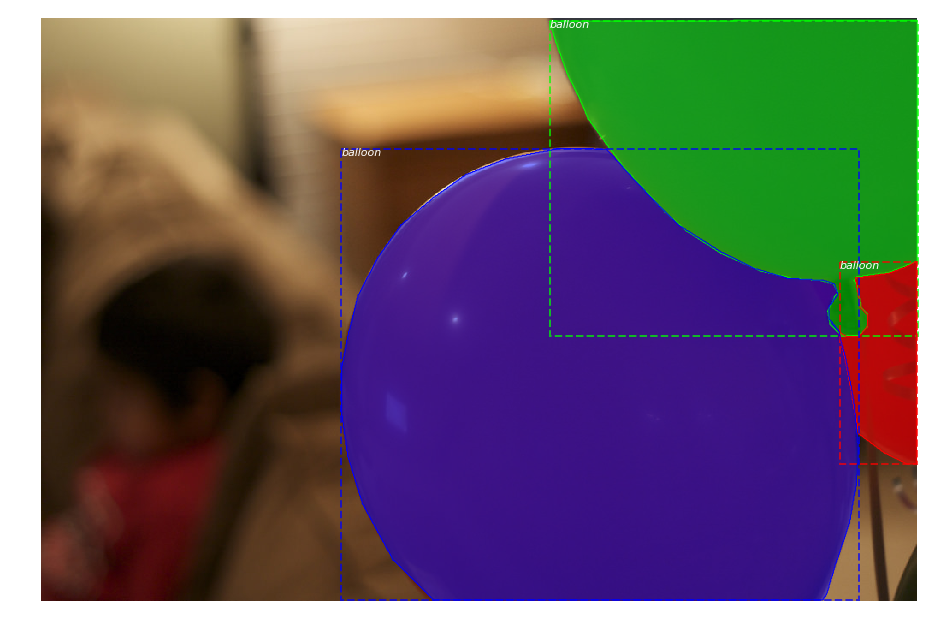

In [4]:
# Load random image and mask.
import random
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)

# Compute Bounding box
import utils as utils
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
from model import log
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
import visualize
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Resize Images

image_id:  49 tmps/balloon/train/5674044810_2d9e2243ff_b.jpg
Original shape:  (1024, 818, 3)
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000
mask                     shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000
class_ids                shape: (2,)                  min:    1.00000  max:    1.00000
bbox                     shape: (2, 4)                min:   29.00000  max:  552.00000


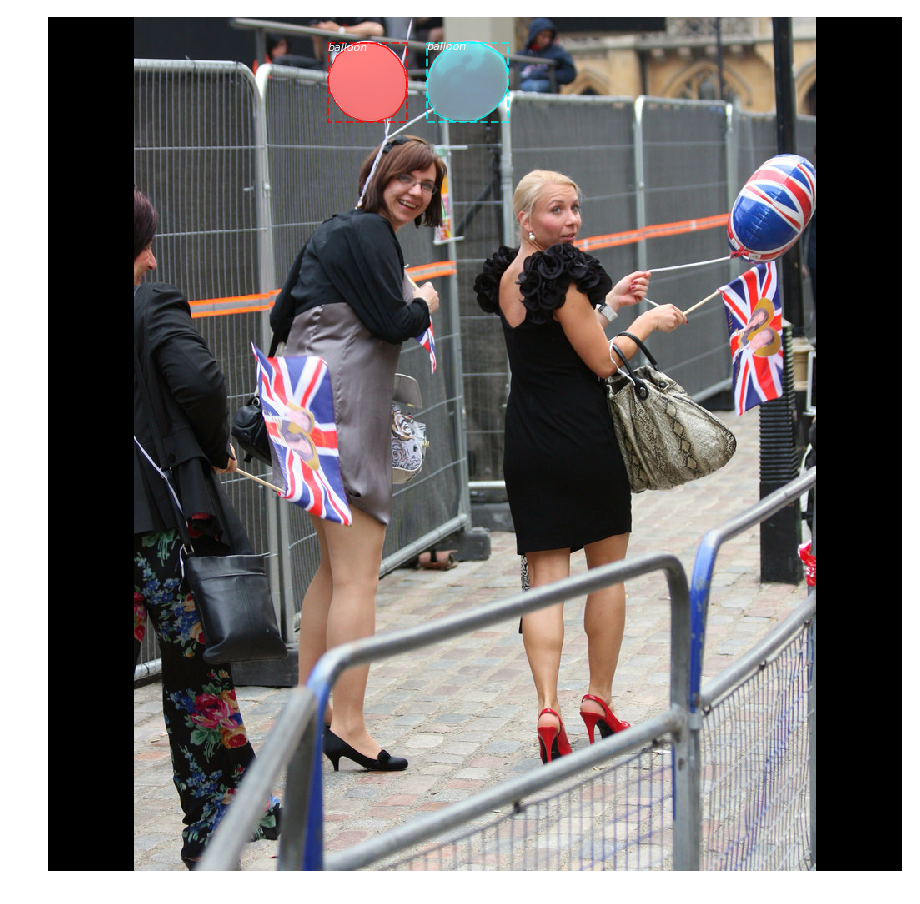

In [5]:
# Load random image and mask.
import numpy as np
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape

# Resize
import utils as utils
image, window, scale, padding = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    padding=config.IMAGE_PADDING)
mask = utils.resize_mask(mask, scale, padding)

# Compute Bounding box
import utils as utils
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
from model import log
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
import visualize
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Mini Masks

image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000
image_meta               shape: (10,)                 min:    0.00000  max: 1024.00000
class_ids                shape: (6,)                  min:    1.00000  max:    1.00000
bbox                     shape: (6, 4)                min:    0.00000  max:  874.00000
mask                     shape: (1024, 1024, 6)       min:    0.00000  max:    1.00000


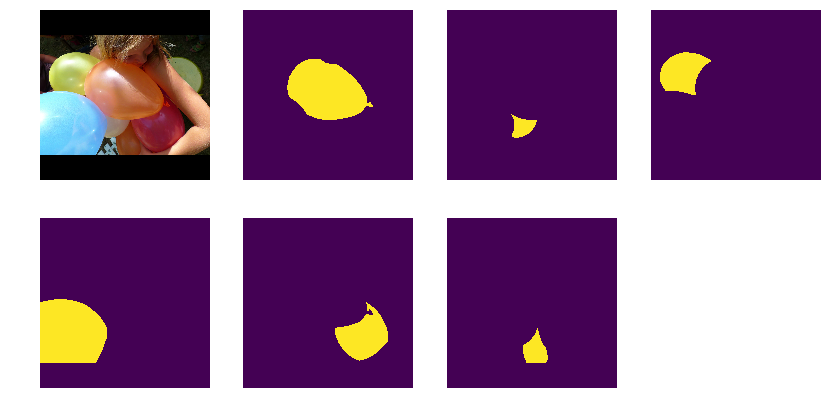

In [6]:
import numpy as np
import visualize
import model as modellib
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

visualize.display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

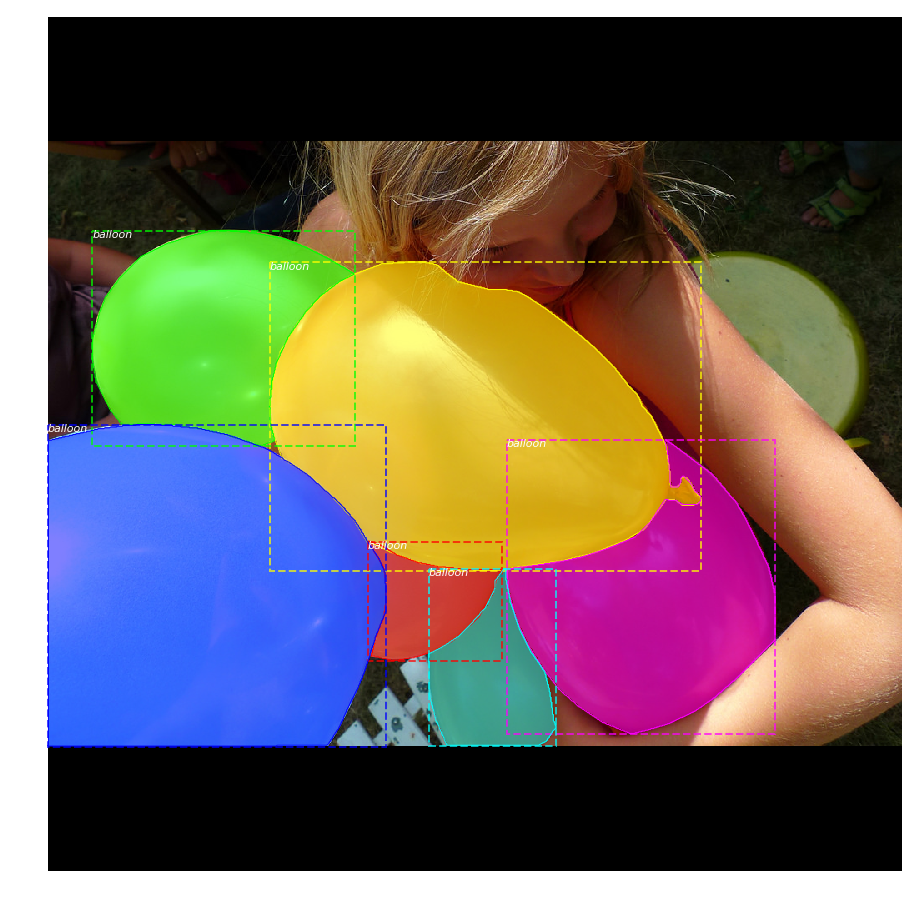

In [7]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

mask                     shape: (56, 56, 6)           min:    0.00000  max:    1.00000


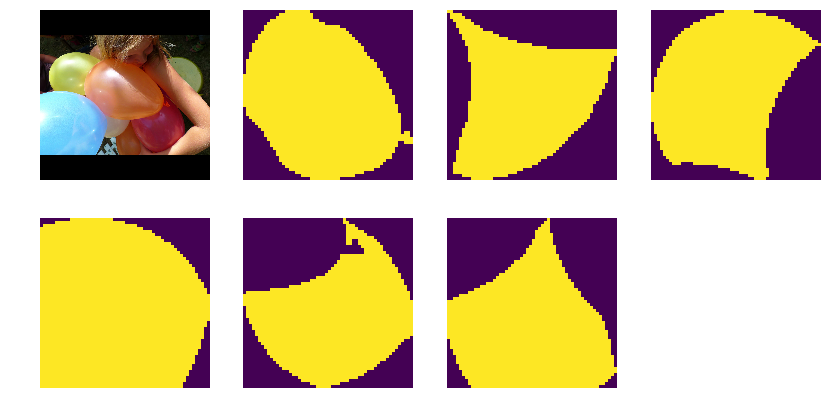

In [8]:
# Add augmentation and mask resizing.
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augment=True, use_mini_mask=True)
log("mask", mask)
visualize.display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])